In [1]:
import io, os, sys, types
import IPython
%run stylometric_Features.ipynb import FeatureExtration
%run N_gram_Final.ipynb import ngramFeatureExtraction
import pandas as pd
import seaborn as sns
import nltk
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from scipy import sparse
import math
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import operator
import itertools
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Using matplotlib backend: Qt5Agg


In [2]:
word_tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
all_instances={
'hrudayashiva':["01","02","03","04","05","06","07","08","09",10,11,12],
    'ravibeliger':[13,14,15,16,17,18,19,20,21,22,23,24,25],
    'somashaker':[26,27,28,29,30,31,32,33,34,35,36]
}

stop_words_list = "C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/new_stop_words.txt"

data_folder = "C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/train"
instance_by_author={}
for author,AllFiles_Per_author in all_instances.items():
    for i in AllFiles_Per_author:
        for name in glob.glob(f"C://Users/RAVIKUMAR/PycharmProjects/Authorship_Attribution_Instance/Data_2/train/instance{i}.txt"):
            with open(name, encoding='utf-8') as file:
                instance_by_author[author+str(i)]=file.read()
all_authors=[]
text=[]
original = pd.DataFrame()
for author, file in instance_by_author.items():
    all_authors.append(author)
    text.append(file)
    
original["Authors with id"] = all_authors
original["text files"]=text
df=pd.DataFrame()  

df["Authors with id"] = all_authors
df["text files"]=text
  

In [3]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def process_to_vecto(X_train, y_train):
    author_fvs={}
    feature_vectors=[]
    for (text,author) in zip(X_train, y_train):
        author_fvs[author]=FeatureExtration(text)
    #--------------------------------------------------------------
    dff = pd.DataFrame()
    dff["X_train"] =X_train
    dff["y_train"] = y_train
    dff["features"] =author_fvs.values()
    y_train = dff["y_train"]
    vectors = dff["features"]
    #----------------------------------------------------------------
    arr = [0,0,0,0,0,0]
    for i in vectors:
        for k in range(500-len(i)):
            i.append(arr)
    arr = (np.array(vectors))
    #-------------------------------------------------------------------
    flatten_final=[]
    for i in range(len(vectors)):
        flatten_final.append(flatten_list(arr[i]))        
    flatten_final = np.asarray(flatten_final)
    #-----------------------------------------------------------------------
    a = flatten_final
    col_mean = np.nanmean(a, axis=0)
    #Find indices that you need to replace
    inds = np.where(np.isnan(a))
    #Place column means in the indices. Align the arrays using take
    a[inds] = np.take(col_mean, inds[1])
    flatten_final = a
    flatten_final=sparse.csr_matrix(flatten_final)
    return  flatten_final
def namingConv(inputNames):
    z= pd.Series(inputNames)
    z.replace(r'(^ra.*)','ravibeligeri',regex=True, inplace = True)
    z.replace(r'(^hr.*)','hrudayashiva',regex=True, inplace = True)
    z.replace(r'(^som.*)','somashaker',regex=True, inplace = True)
    names =z
    return names


In [4]:
X=original["text files"]
y=all_authors
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train_Up, X_test_Up, y_train_Up, y_test_Up = train_test_split(X,y,test_size=0.2, random_state=1234)

In [5]:

train_data=process_to_vecto(X_train_Up,y_train_Up)
train_lable=namingConv(y_train_Up)

testdata=process_to_vecto(X_test_Up, y_test_Up)
testlable=namingConv(y_test_Up)

In [6]:
original

,Authors with id,text files
0,hrudayashiva01,"\nಹೋಳಿ ಹಬ್ಬದ ಸಂಭ್ರಮ, ಖುಷಿಗಳನ್ನು ನೀವೂ ಅನುಭವಿಸಿರ..."
1,hrudayashiva02,ಪ್ರಖ್ಯಾತ ಹಿಂದೂಸ್ತಾನಿ ಸಂಗೀತಗಾರ ಪಂಡಿತ್ ಪರಮೇಶ್ವರ ...
2,hrudayashiva03,\nಟಾಮ್ ಹಾಂಕ್ಸ್ ಕ್ಯಾಲಿಫೋರ್ನಿಯಾದ ಪ್ರತಿಭಾವಂತ. ಈತ ...
3,hrudayashiva04,\nಹೆಂಡತಿಯು ಹದ ಮಾಡಿಕೊಟ್ಟ ತಾಂಬೂಲ ಜಗಿಯುತ್ತಲೇ ಅವರು...
4,hrudayashiva05,\n'ಈ ಹಾಡನ್ನು ಬೇರೆ ಯಾರಿಂದಲಾದರೂ ಬರೆಸಿಬಿಡಿ ಪ್ಲೀಸ್...
5,hrudayashiva06,\nನಾನು ಹದಿನಾರನೇ ವಯಸ್ಸಿಗೆ ಹಳ್ಳಿಗಳನ್ನು ಬಿಟ್ಟಿದ್ದ...
6,hrudayashiva07,\nದೆವ್ವಗಳ ಬಗ್ಗೆ ಚರ್ಚಿಸುವುದೇ ವೇಳೆ ಹಾಳುಮಾಡಿಕೊಳ್ಳ...
7,hrudayashiva08,\nಅನಂತಮೂರ್ತಿಯವರ ಕುರಿತು ಒಂದಿಷ್ಟು ಧ್ಯಾನಿಸುವ ಸಮಯವ...
8,hrudayashiva09,\nಅದೊಂದು ಮಾಮೂಲಿ ದಿನ… ಆ ಸಂಜೆ ಒಂದು ಕಾರ್ಯಕ್ರಮಕ್ಕೆ...
9,hrudayashiva10,\nದಟ್ಟ ಮೌನ ಕವಿದಿದೆ. ತಾತನ ಗೋರಿಯ ಪಕ್ಕದಲ್ಲಿ ಕುಳಿತ...


In [7]:


model1 = DecisionTreeClassifier(random_state=0)
model1 = model1.fit(train_data.toarray(), train_lable)

print("Taining Accuracy :",model1.score(train_data.toarray(), train_lable))
print("Testing Accuracy: ",model1.score(testdata.toarray(), testlable))


Taining Accuracy : 1.0
Testing Accuracy:  0.5


In [8]:
predictions = model1.predict(testdata)
print(classification_report(testlable, predictions))


              precision    recall  f1-score   support

hrudayashiva       0.50      0.33      0.40         3
ravibeligeri       0.50      0.50      0.50         2
  somashaker       0.50      0.67      0.57         3

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.49         8
weighted avg       0.50      0.50      0.49         8



In [9]:
from sklearn.utils import resample


Class=1, n=11 (33.333%)
Class=0, n=11 (33.333%)
Class=2, n=11 (33.333%)


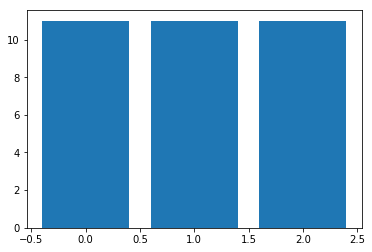

In [13]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# # load the csv file as a data frame
# df = read_csv(url, header=None)
# data = df.values
# split into input and output elements
X, y = train_data, train_lable
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()
